
=== Logistic Regression ===
Accuracy: 0.832
Confusion Matrix:
 [[1729  330]
 [  79  303]]


,precision,recall,f1-score,support
0,0.956,0.840,0.894,2059.000
1,0.479,0.793,0.597,382.000
accuracy,0.832,0.832,0.832,0.832
macro avg,0.717,0.816,0.746,2441.000
weighted avg,0.882,0.832,0.848,2441.000


c:\Users\LIM TZE TA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

=== Feedforward Neural Network ===
Accuracy: 0.831
Confusion Matrix:
 [[1708  351]
 [  61  321]]


,precision,recall,f1-score,support
0,0.966,0.830,0.892,2059.000
1,0.478,0.840,0.609,382.000
accuracy,0.831,0.831,0.831,0.831
macro avg,0.722,0.835,0.751,2441.000
weighted avg,0.889,0.831,0.848,2441.000


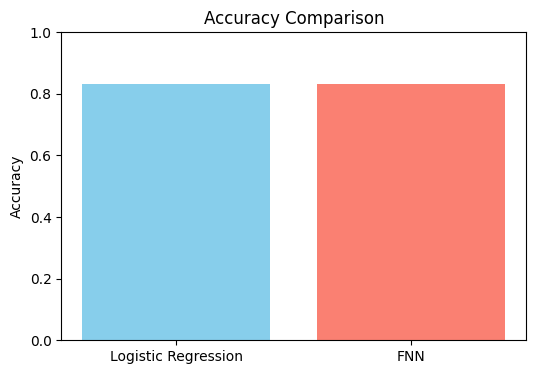

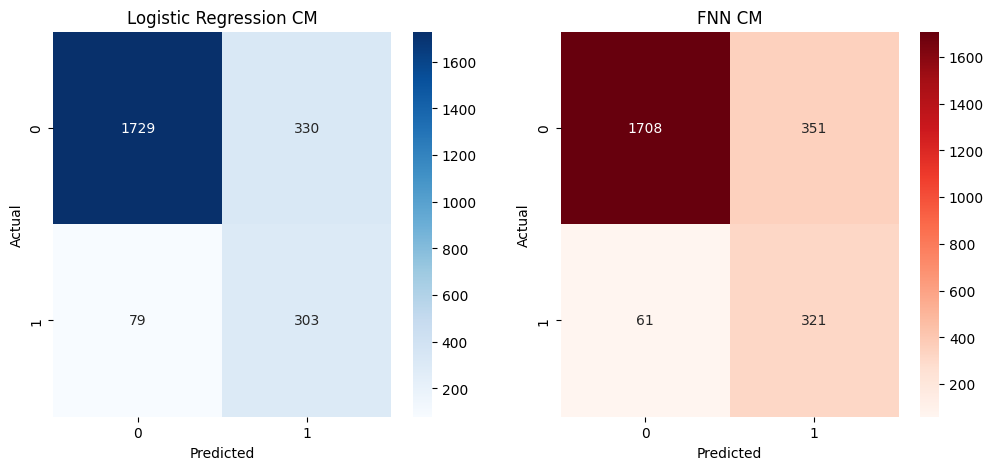

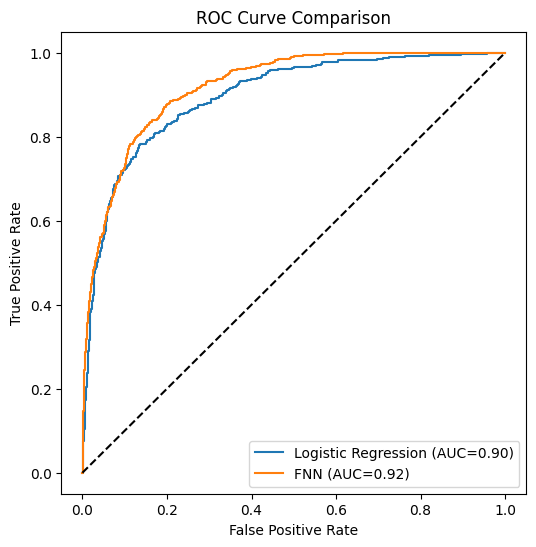

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)

# Load and Prepare Data

df = pd.read_csv(r"C:\Users\LIM TZE TA\VSCodeProjects\ML_Assignment\Classification\online_shoppers_intention_cleaned.csv")

# Features and Target
X = df.drop('Revenue', axis=1)
y = df['Revenue'].astype(int)  # Convert True/False to 1/0

# Encode Categorical Features
X = pd.get_dummies(X, drop_first=True)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Logistic Regression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_prob_logreg = logreg.predict_proba(X_test_scaled)[:,1]

# Define custom threshold
threshold = 0.15  

# Apply threshold
y_pred_logreg = (y_pred_prob_logreg >= threshold).astype(int)

# Metrics
acc_logreg = accuracy_score(y_test, y_pred_logreg)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)

print("\n=== Logistic Regression ===")
print(f"Accuracy: {acc_logreg:.3f}")
print("Confusion Matrix:\n", cm_logreg)
display(pd.DataFrame(report_logreg).transpose().round(3))

# Feedforward Neural Network (FNN)
fnn = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

fnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = fnn.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=0
)

# Predictions
y_pred_prob_fnn = fnn.predict(X_test_scaled)
y_pred_fnn = (y_pred_prob_fnn > 0.15).astype(int)

# Metrics
acc_fnn = accuracy_score(y_test, y_pred_fnn)
cm_fnn = confusion_matrix(y_test, y_pred_fnn)
report_fnn = classification_report(y_test, y_pred_fnn, output_dict=True)

print("\n=== Feedforward Neural Network ===")
print(f"Accuracy: {acc_fnn:.3f}")
print("Confusion Matrix:\n", cm_fnn)
display(pd.DataFrame(report_fnn).transpose().round(3))


# Comparison Plots

# Accuracy Comparison
plt.figure(figsize=(6,4))
plt.bar(['Logistic Regression', 'FNN'], [acc_logreg, acc_fnn], color=['skyblue','salmon'])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

# Confusion Matrices Side by Side
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression CM')
axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('Actual')

sns.heatmap(cm_fnn, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('FNN CM')
axes[1].set_xlabel('Predicted'); axes[1].set_ylabel('Actual')

plt.show()

# ROC Curve Comparison
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_fnn, tpr_fnn, _ = roc_curve(y_test, y_pred_prob_fnn)
roc_auc_fnn = auc(fpr_fnn, tpr_fnn)

plt.figure(figsize=(6,6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC={roc_auc_logreg:.2f})')
plt.plot(fpr_fnn, tpr_fnn, label=f'FNN (AUC={roc_auc_fnn:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc='lower right')
plt.show()
